<a href="https://colab.research.google.com/github/agustinivandinocco-python/pythonpracticateoria/blob/main/Colab/clase_10_2025_ML_Clasificaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crítica a las regresiones

* Se presta mucho a interpretaciones muy heterogeneas
* Se presta mucho a parametrizaciones (tipos) que llevan a resultados muy diferentes
* Asumen muchos supuestos que en la practica es imposible que no se violen

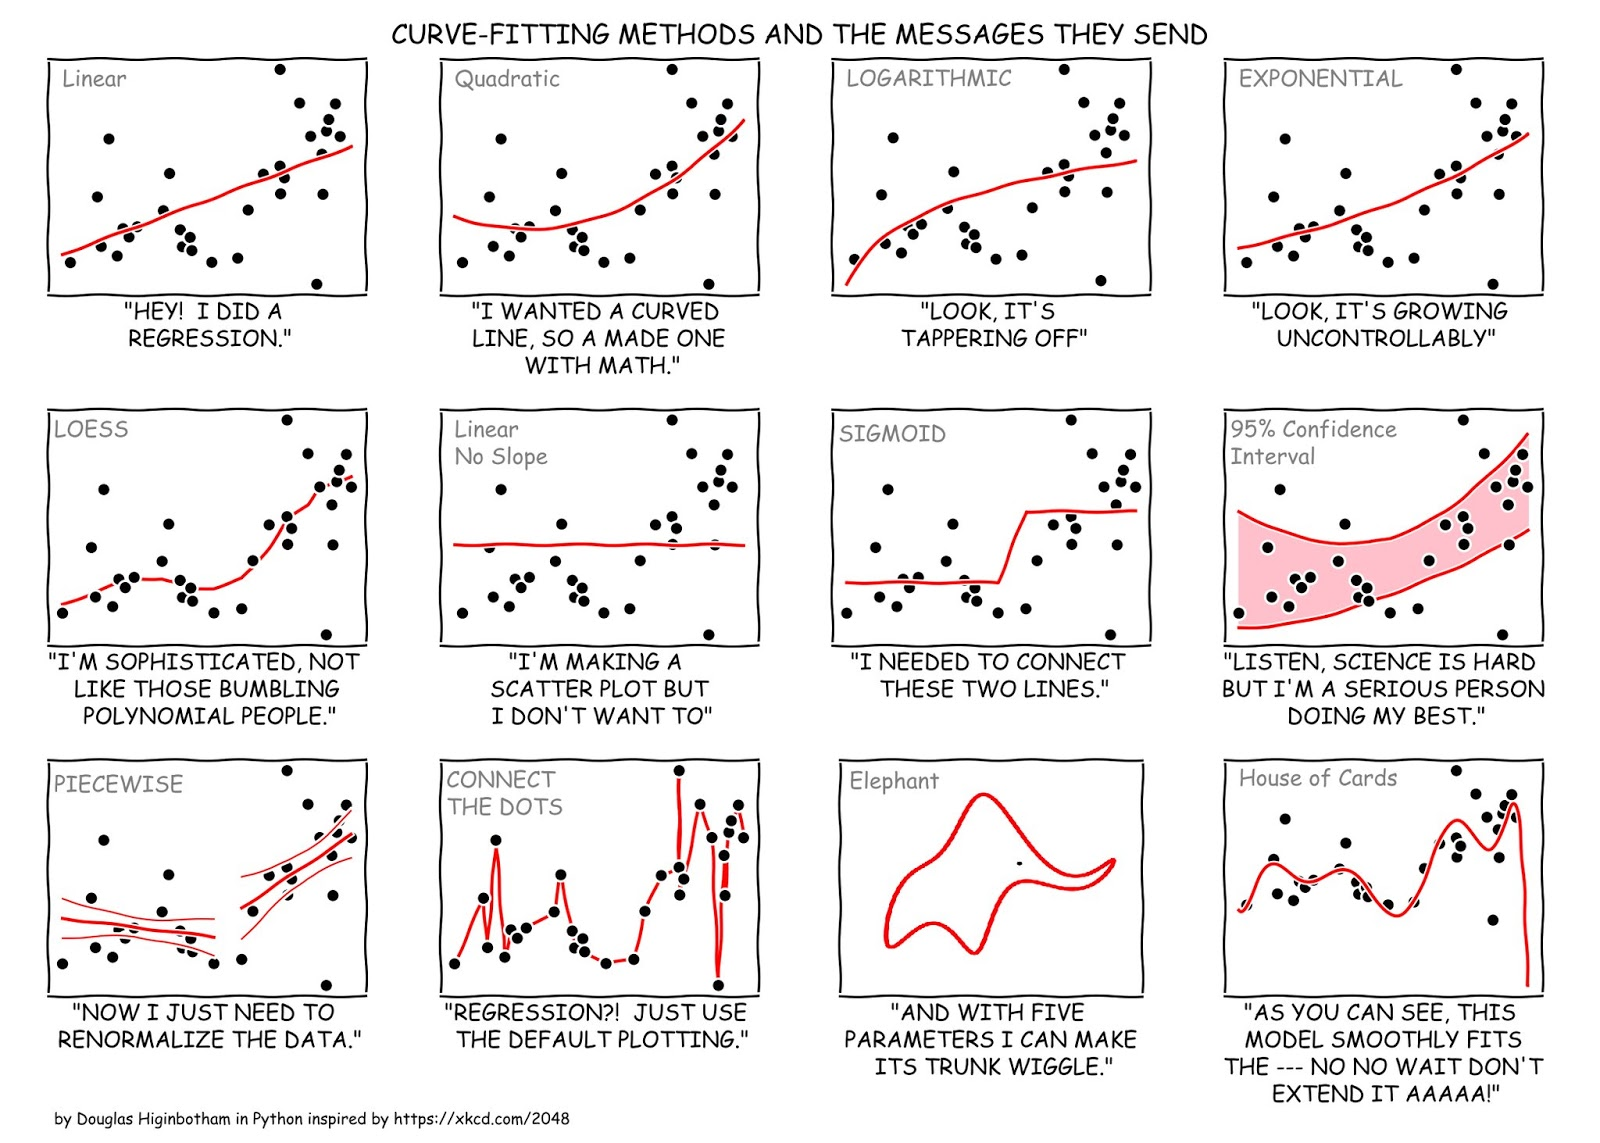

# Aprendizaje Supervisado: Algoritmos de Clasificación

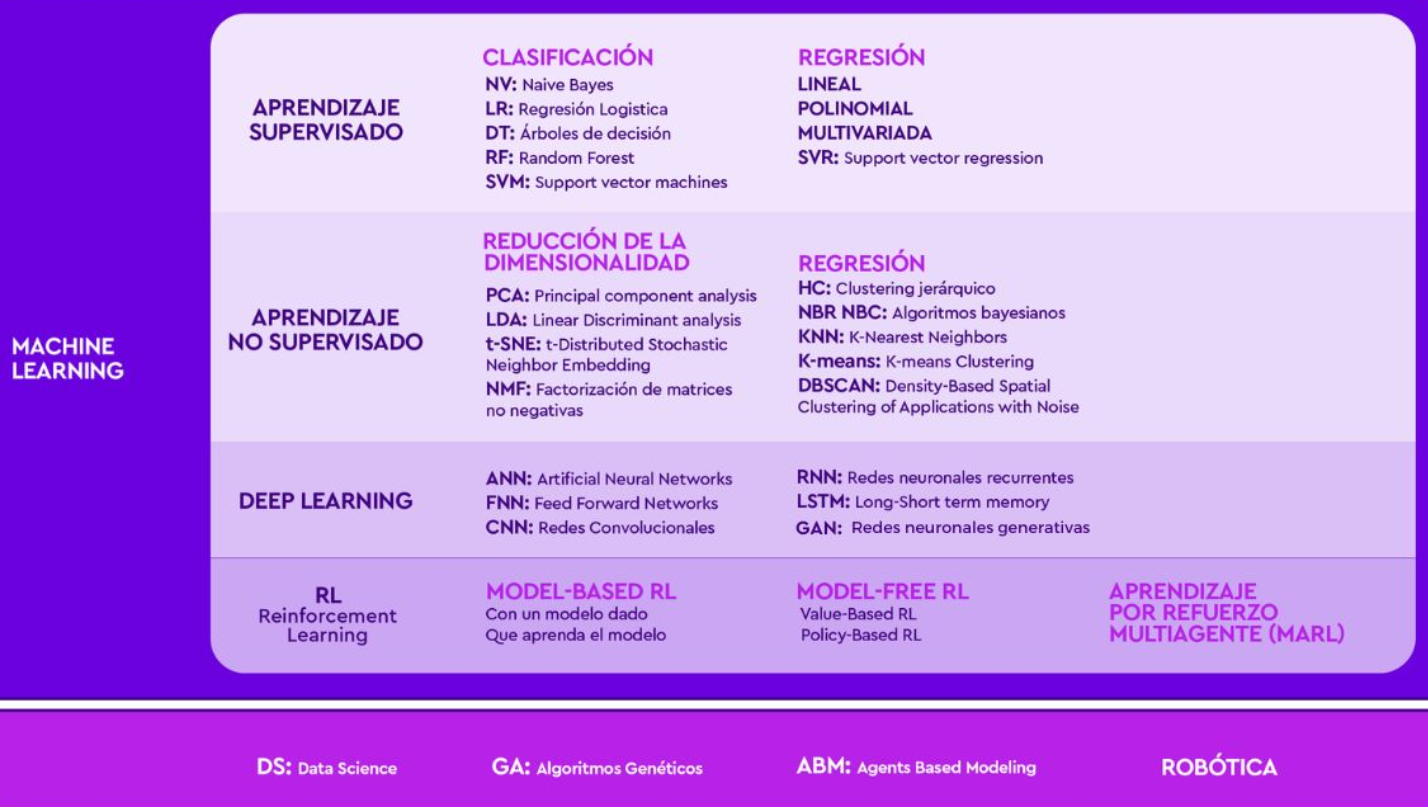

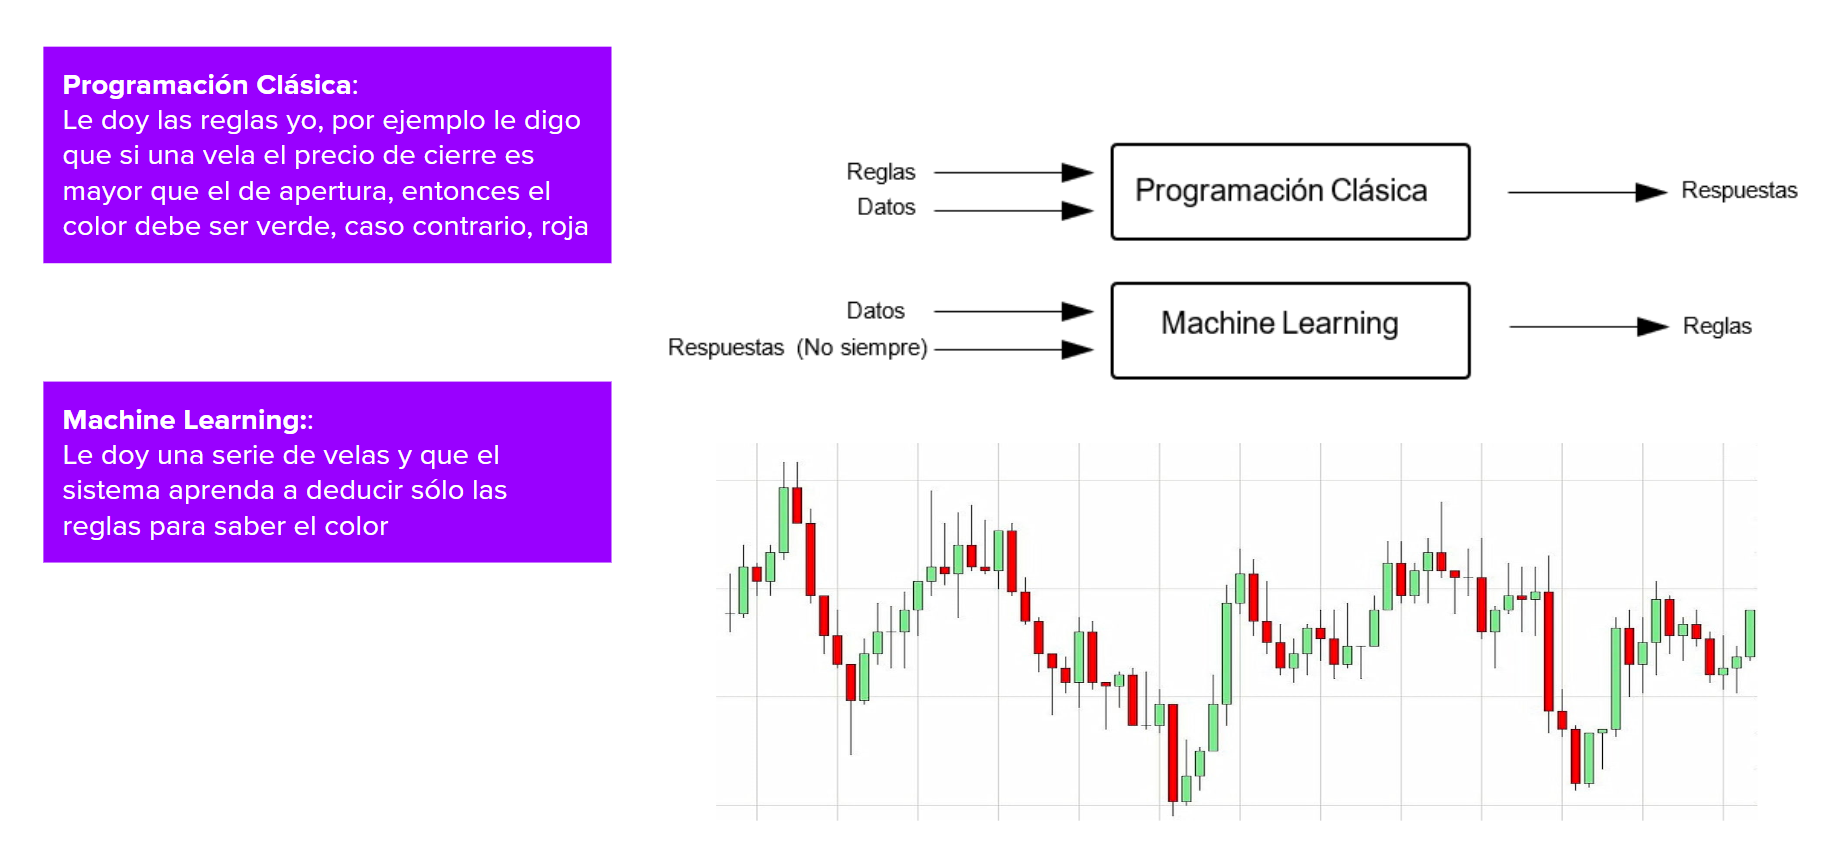

# Importancia de los "features" o predictores

## Construcción de Indicadores

1. Indicadores sobre serie de precios
    * Indicadores tardíos (trend-following)
    * Indicadores de saturación (contrarians)
    * Indicadores absolutos/referencia: Osciladores acotados (sobre precio o sobre indicadores)
2. Indicadores de flujos (volumen y derivados)
3. Indicadores combinados
4. Conteos discretos
5. Estacionalidad
6. Indicadores Estadísticos
7. Referenciales (Benchmarks)
8. Ratios y series de Análisis Fundamental
9. Sentiment
10. Exógenos al mercado

# Importancia de la cantidad de datos

    * Distintas épocas (ej, que tengan bear markets, derrapes fuertes, grandes voladuras, mercados laterales)
    * Variabilidad de activos similares
    * Variabilidad de industrias
    * Variabilidad de países
    * Cantidades de datos acordes al fiting que se pretenda

# Arboles de decisión

Programa de ML que encuentra las preguntas optimas para poder "adivinar" el target con mejor probabilidad de exito

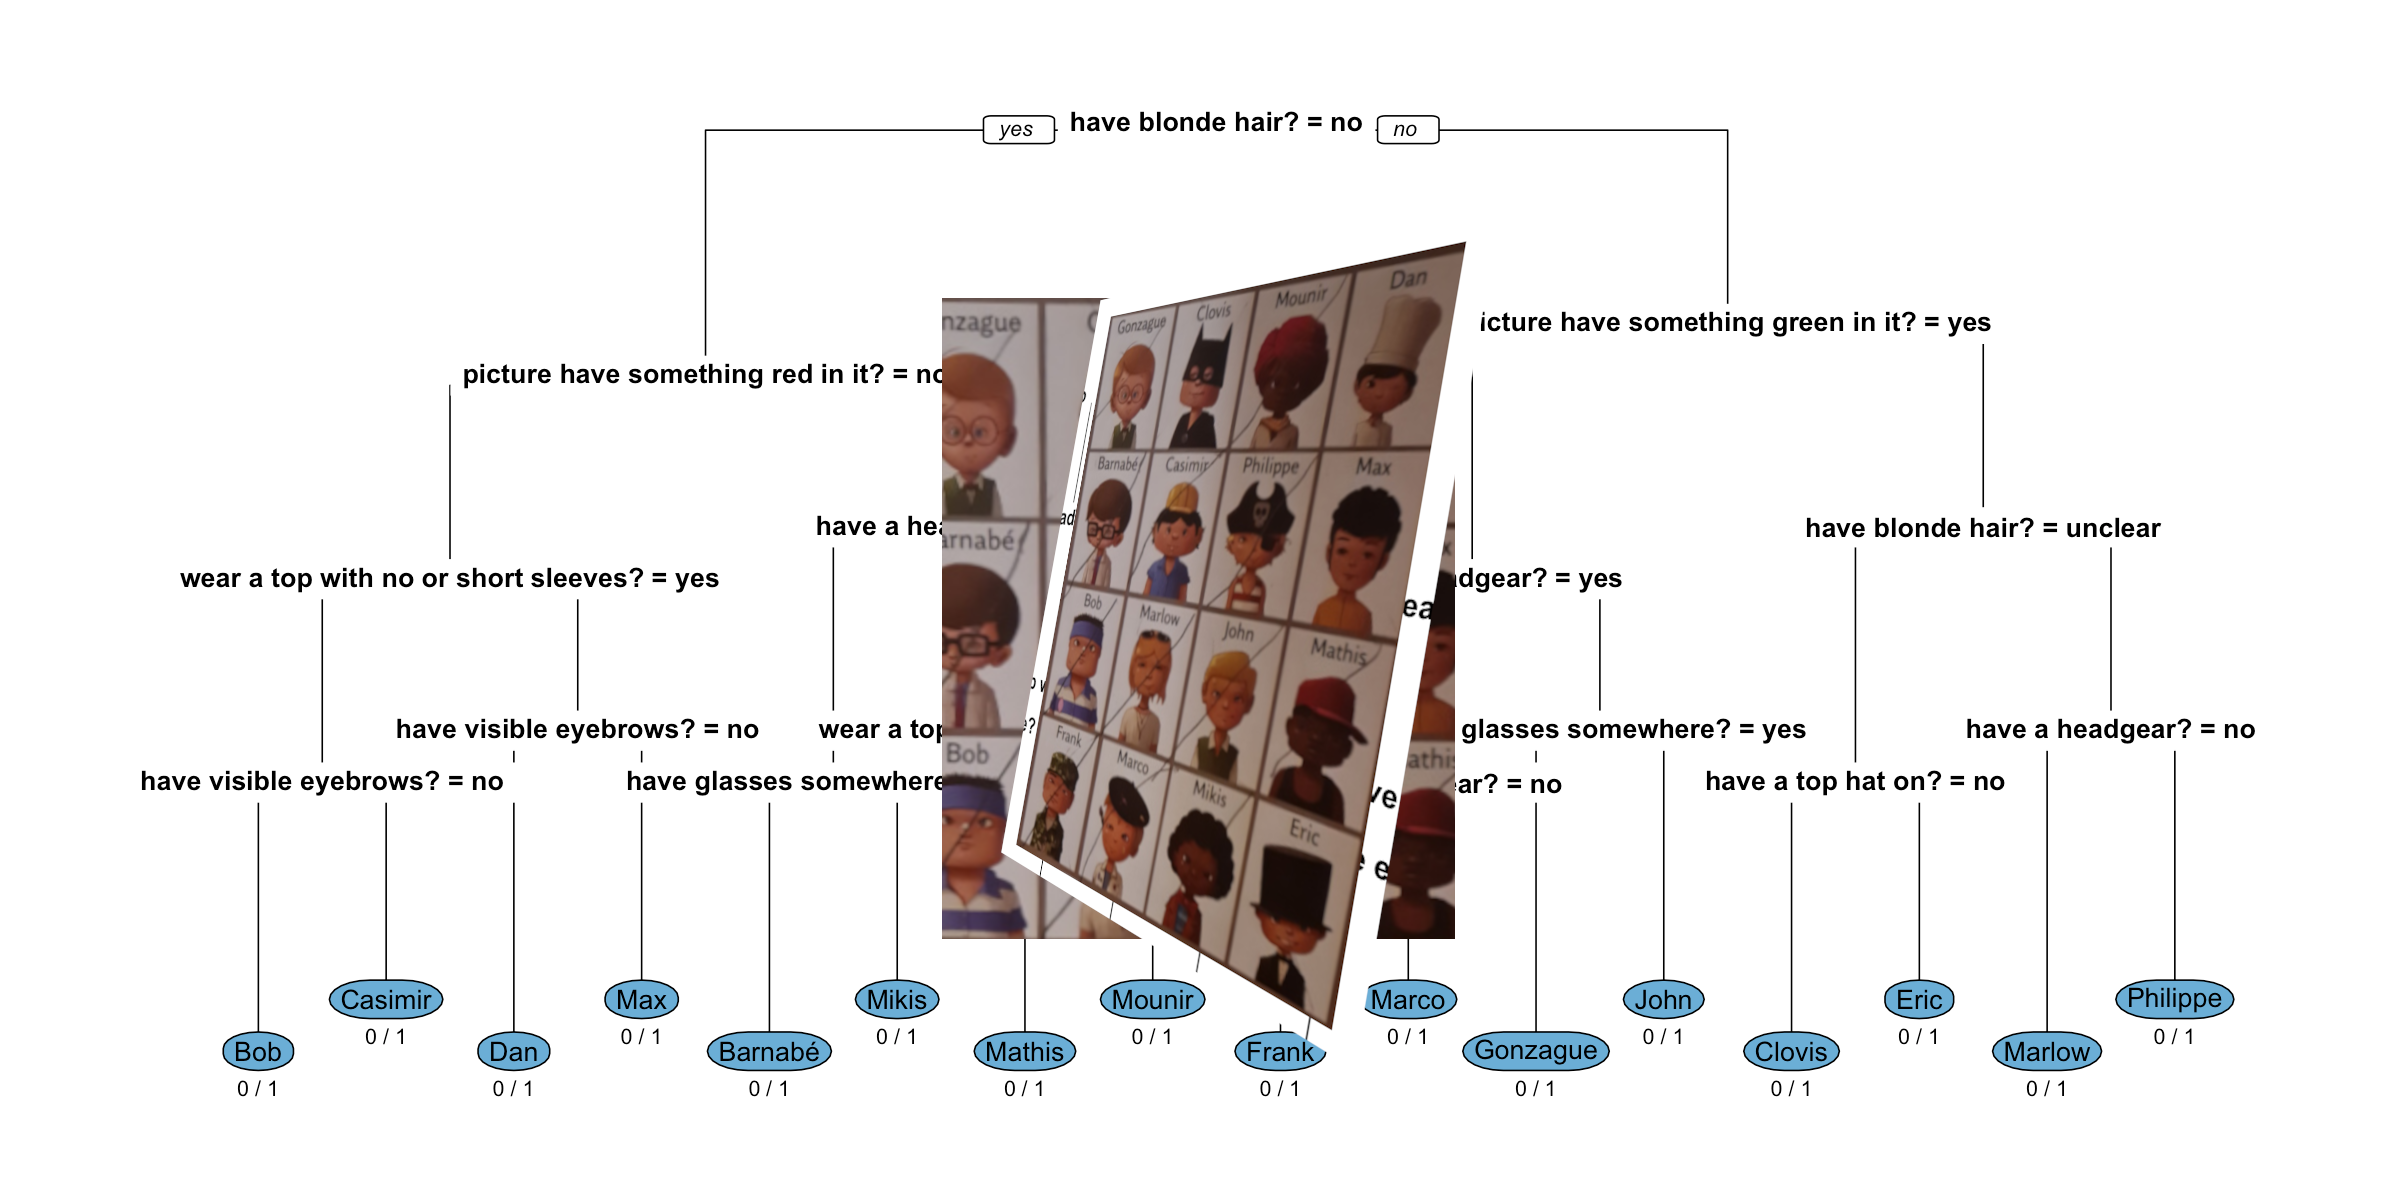

## Ejemplo de salida del algoritmo de ML

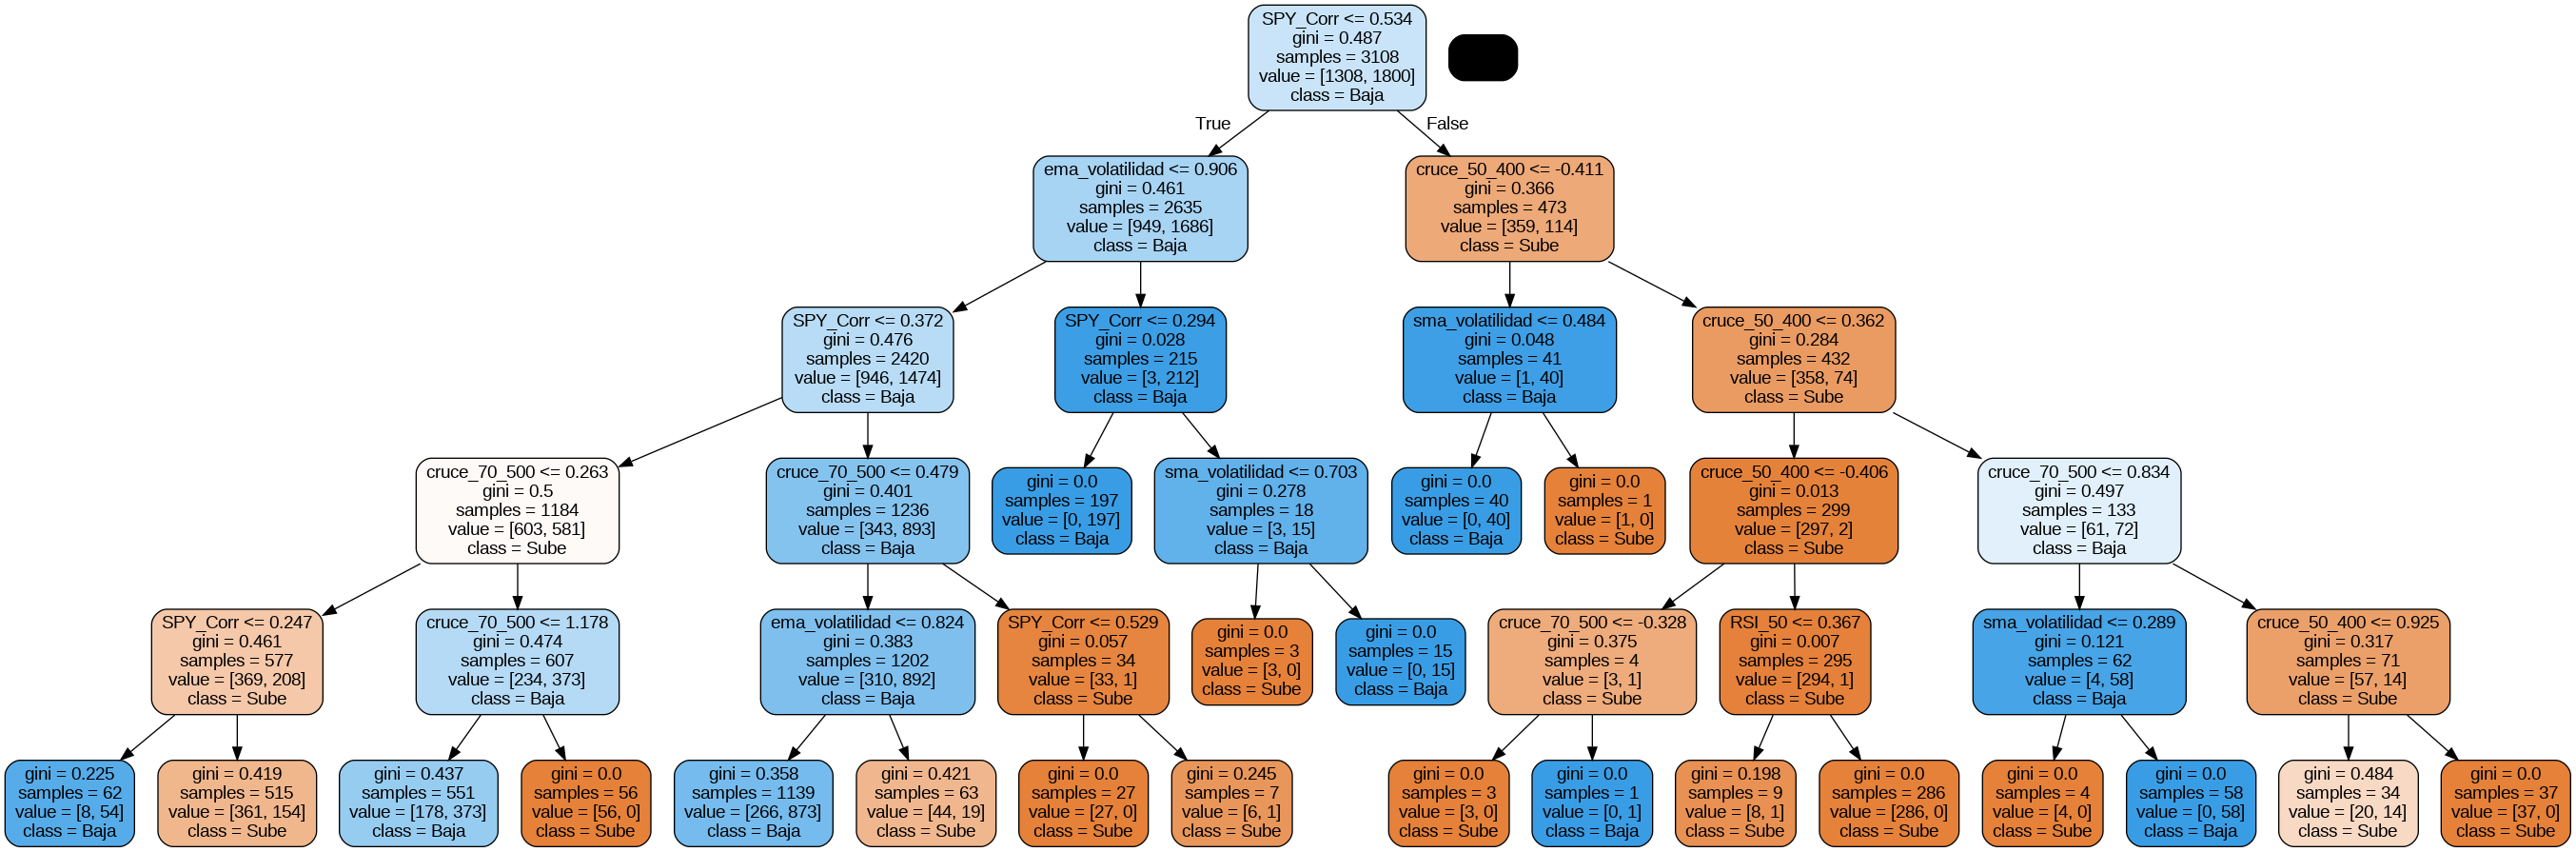

## Preparamos los datos: GGAL + 7 predictores + TARGET

In [ ]:
import yfinance as yf, numpy as np, pandas as pd

smas = ((30, 100), (50, 200), (70, 300))
ventana = 200 # Para el target a futuro

TICKER = "GGAL"
data = yf.download(TICKER, start='2000-01-01', auto_adjust=True)
spy = yf.download('SPY', start='2000-01-01', auto_adjust=True)

dif = data['Close'].diff()
RSI_CONS = 50
win = pd.DataFrame(np.where(dif > 0, dif, 0))
loss = pd.DataFrame(np.where(dif < 0, abs(dif), 0))
ema_win = win.ewm(alpha=1/RSI_CONS).mean()
ema_loss = loss.ewm(alpha=1/RSI_CONS).mean()
rs = ema_win / ema_loss
rsi = 100 - (100 / (1 + rs))
rsi.index = data.index

data['pctChange'] = data['Close'].pct_change()
data['fw'] = data['Close'].shift(-ventana)/data['Close']-1   # Este valor futuro es el target a predecir

data[f'RSI_{RSI_CONS}'] = rsi/100
data['sma_volatilidad'] = data['pctChange'].rolling(50).std() * 50**0.5
data['ema_volatilidad'] = data['pctChange'].ewm(span=40).std() * 40**0.5
data['SPY_Corr'] = data.Close.pct_change()[TICKER].rolling(40).corr(spy.Close.pct_change())
c1 = f'cruce_{smas[0][0]}_{smas[0][1]}'
c2 = f'cruce_{smas[1][0]}_{smas[1][1]}'
c3 = f'cruce_{smas[2][0]}_{smas[2][1]}'
data[c1] = data['Close'].rolling(smas[0][0]).mean()/data['Close'].rolling(smas[0][1]).mean()-1
data[c2] = data['Close'].rolling(smas[1][0]).mean()/data['Close'].rolling(smas[1][1]).mean()-1
data[c3] = data['Close'].rolling(smas[2][0]).mean()/data['Close'].rolling(smas[2][1]).mean()-1

data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open   Volume pctChange  \
Ticker           GGAL       GGAL       GGAL       GGAL     GGAL             
Date                                                                        
2000-07-25  13.026936  13.213035  12.468638  13.015304   126200       NaN   
2000-07-26  13.026936  13.073460  12.794312  12.840836    28900  0.000000   
2000-07-27  13.026936  13.119985  12.933886  13.026936    61200  0.000000   
2000-07-28  12.933884  13.073458  12.747785  13.073458   146100 -0.007143   
2000-07-31  13.166511  13.166511  12.561689  13.026936   178400  0.017986   
...               ...        ...        ...        ...      ...       ...   
2025-05-27  61.360001  63.750000  60.970001  63.680000  1327500 -0.023863   
2025-05-28  60.590000  61.380001  56.730000  60.299999  2185400 -0.012549   
2025-05-29  58.169998  61.470001  57.840000  61.110001  1687700 -0.039941   
2025-05-30  58.049999  58.340000  56.590000  57.450001  1542500 -0.002063   
2025-06-02  56.639999  58.395000  56.480000  57.450001  1163169 -0.024289   

Price             fw    RSI_50 sma_volatilidad ema_volatilidad  SPY_Corr  \
Ticker                                                                     
Date                                                                       
2000-07-25 -0.098005       NaN             NaN             NaN       NaN   
2000-07-26 -0.118981       NaN             NaN             NaN       NaN   
2000-07-27 -0.137627       NaN             NaN        0.000000       NaN   
2000-07-28 -0.115578  0.000000             NaN        0.026404       NaN   
2000-07-31 -0.080471  0.718388             NaN        0.069713       NaN   
...              ...       ...             ...             ...       ...   
2025-05-27       NaN  0.518685        0.306541        0.216484  0.683489   
2025-05-28       NaN  0.513229        0.306178        0.212053  0.690805   
2025-05-29       NaN  0.496478        0.302722        0.214396  0.680873   
2025-05-30       NaN  0.495660        0.298225        0.209106  0.681597   
2025-06-02       NaN  0.486052        0.298287        0.206450  0.682987   

Price      cruce_30_100 cruce_50_200 cruce_70_300  
Ticker                                             
Date                                               
2000-07-25          NaN          NaN          NaN  
2000-07-26          NaN          NaN          NaN  
2000-07-27          NaN          NaN          NaN  
2000-07-28          NaN          NaN          NaN  
2000-07-31          NaN          NaN          NaN  
...                 ...          ...          ...  
2025-05-27     0.005548     0.061427     0.259561  
2025-05-28     0.005374     0.059517     0.256627  
2025-05-29     0.006387     0.058372     0.253126  
2025-05-30     0.007296     0.056150     0.249487  
2025-06-02     0.006780     0.054070     0.245182  

[6251 rows x 14 columns]

## Definimos lo que vamos a querer predecir

    * Se puede predecir algo binario con probabilidades aprox 50% y 50%
    * Se puede predecir un suceso de cola direccional (ej. que se vuele mas del 50% en un mes)
    * Se puede predecir un evento de cola no direccional (ej. que se mueva +/- 20% en una semana)

    * Se puede contrastar verosimilitud entre predicciones
      Por ejemplo:
      - Hago un modelo que prediga si va a subir o bajar (mas o menos tiene 50% cada opcion)
      - Luego hago otro modelo que prediga la probabilidad que se vuele un 30% el proximo mes
      - Luego contrasto, si el primer modelo me predice que baja y el segundo un 70% de probabilidades que se vuele, algo anda mal

## Examinemos la matriz de diseño X

In [ ]:
data['target'] = 0
data.loc[data.fw >= 0 , 'target'] = 1

data_full = data.copy() # Esto nos va a servir despues cuando necesitemos los de hoy (sin etiquetas aun)
data = data.round(4).dropna()

y = list(data['target']) # y tiene 1 cuando sube y 0 cuando baja a futuro
X = data.iloc[:,-8:-1]

X

Price       RSI_50 sma_volatilidad ema_volatilidad SPY_Corr cruce_30_100  \
Ticker                                                                     
Date                                                                       
2001-10-05  0.3407          0.3558          0.3288   0.4239      -0.3351   
2001-10-08  0.3379          0.3536          0.3209   0.4242      -0.3436   
2001-10-09  0.3405          0.3532          0.3167   0.4169      -0.3510   
2001-10-10  0.3556          0.3664          0.3397   0.4838      -0.3605   
2001-10-11  0.3758          0.3849          0.3710   0.5059      -0.3673   
...            ...             ...             ...      ...          ...   
2024-08-07  0.5122          0.2601          0.2311   0.4209      -0.0387   
2024-08-08  0.5585          0.2967          0.2988   0.5394      -0.0390   
2024-08-09  0.5733          0.2982          0.2959   0.5313      -0.0388   
2024-08-12  0.5733          0.2876          0.2889   0.5316      -0.0374   
2024-08-13  0.5751          0.2861          0.2818   0.5187      -0.0325   

Price      cruce_50_200 cruce_70_300  
Ticker                                
Date                                  
2001-10-05      -0.3715      -0.3030  
2001-10-08      -0.3785      -0.3110  
2001-10-09      -0.3847      -0.3195  
2001-10-10      -0.3902      -0.3278  
2001-10-11      -0.3946      -0.3355  
...                 ...          ...  
2024-08-07       0.3022       0.5287  
2024-08-08       0.2972       0.5254  
2024-08-09       0.2922       0.5219  
2024-08-12       0.2850       0.5186  
2024-08-13       0.2789       0.5157  

[5752 rows x 7 columns]

## Examinamos el vector target y

In [ ]:
sum(y), len(y), sum(y)/len(y)  # fw positivo, totales, porcentaje positivos

(3624, 5752, 0.6300417246175244)

In [ ]:
data['target'].loc[data.target>0].shape

(3624,)

In [ ]:
3623/5751 # son 3623 que suben en un total de 5751 => esta sesgado al alza un 63%

0.6299773952356112

In [ ]:
# ¿Que porcentaje tengo de positivos sobre totales?
# ¿Que problema habría si estuviera muy desbalanceado?

## Separamos datos de entrenamiento de validación

In [ ]:
len(X), len(y)

(5752, 5752)

In [ ]:
from sklearn.model_selection import train_test_split


# Disclaimer, esto para series con features autoregresivos como las medias moviles largas no esta del todo bien
# Si se usan este tipo de features hay que pensar un pipeline mas adecuado (ej. usar cross validation),
# de hecho, en realidad, no se deberian usar random split para series de tiempo si uno es mas estricto
# Hacemos este ejemplo asi por una cuestion didactica pero no usar esto en la vida real ni ahi :)

# Vamos a ver que el resultado es demasiado bueno para ser real, lo interesante es entender donde esta el DATA LEAK que estamos provocando

# Entrenamos con el 85% de los datos al modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [ ]:
X_train

Price       RSI_50 sma_volatilidad ema_volatilidad SPY_Corr cruce_30_100  \
Ticker                                                                     
Date                                                                       
2011-06-30  0.5270          0.1518          0.1257   0.5256      -0.0605   
2002-07-29  0.4294          1.2183          0.9330  -0.0766      -0.4459   
2019-03-12  0.4572          0.2100          0.2054   0.4362       0.1325   
2009-11-16  0.6255          0.2035          0.1843   0.6043       0.2938   
2008-08-18  0.4205          0.2184          0.1864   0.5278      -0.1400   
...            ...             ...             ...      ...          ...   
2009-12-02  0.5546          0.2119          0.1767   0.5414       0.2401   
2004-10-12  0.5846          0.1522          0.1451   0.2815       0.1024   
2023-03-17  0.4831          0.2909          0.2492   0.4905       0.2261   
2003-11-20  0.5468          0.2236          0.2292   0.0513       0.2045   
2006-06-26  0.4134          0.1839          0.1742   0.6782      -0.1249   

Price      cruce_50_200 cruce_70_300  
Ticker                                
Date                                  
2011-06-30      -0.0682       0.1387  
2002-07-29      -0.7374      -0.8535  
2019-03-12       0.0497      -0.2559  
2009-11-16       0.5634       0.5613  
2008-08-18      -0.2234      -0.2777  
...                 ...          ...  
2009-12-02       0.5556       0.6302  
2004-10-12      -0.1507      -0.1052  
2023-03-17       0.4133       0.2735  
2003-11-20       0.3920       0.6331  
2006-06-26      -0.0901      -0.0896  

[4889 rows x 7 columns]

In [ ]:
# Una idea para evitar data-leak seria por ejemplo:
# entrenamiento 0-500   ventana ciega 500-800   validacion 800-1000   ventana ciega 1000-1300
# entrenamiento 1300-1800   ventana ciega 1800-2100   validacion 2100-2300   ventana ciega

In [ ]:
# Dejo un ejemplo super burdo de split para que luego prueben las diferencias de haber tenido data-leak

#X_train, X_test = X.iloc[:4500], X.iloc[4500:]
#y_train, y_test = y[:4500], y[4500:]

# ¿Que trampa estoy haciendo usando predictores muy largos autoregresivos para predecir?

In [ ]:
len(X_train), len(X_test)

(4889, 863)

## Importamos el modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=1) # por default es gini, otros entropy
modelo

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)

Parámetros importantes:
    
* criterion: entropy/gini
* <b>max_depth</b>: Cantidad de subnodos desde cada hilo ppal (profundidad)
* random_state

$$ {\text{Ganancia de información, Entropia}}(S)= \large - \sum _{i=1}^{n}p_{i}\log _{2}p_{i} $$

$$ {\text{Impureza de Gini} \hspace{0.5cm}  \large I_{G}(p)=\sum _{i=1}^{m}p_{i}(1-p_{i})=\sum _{i=1}^{m}(p_{i}-{p_{i}}^{2})=1-\sum _{i=1}^{m}{p_{i}}^{2}} $$

Ver Shannon y Weaber formulacion matematica de la teoría de la información

## Entrenamiento

In [ ]:
%%time
modelo.fit(X_train, y_train)
modelo

CPU times: user 46.4 ms, sys: 0 ns, total: 46.4 ms
Wall time: 45.9 ms


DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)

## Corremos el modelo para predecir

In [ ]:
# Aca le tomo examen al modelo:
    # 1- le pido que prediga los X out of sample, que no use para entrenar
    # 2- Como yo tenia los fw de esos X, corroboro si predice bien..

y_pred = modelo.predict(X_test)
y_pred[:50]

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1])

In [ ]:
X_test.iloc[:3]

Price       RSI_50 sma_volatilidad ema_volatilidad SPY_Corr cruce_30_100  \
Ticker                                                                     
Date                                                                       
2009-07-07  0.5970          0.3811          0.2932   0.2806       0.3213   
2002-12-30  0.5984          0.5192          0.5936  -0.0427       0.5027   
2024-05-24  0.5777          0.2515          0.2518   0.4864       0.3061   

Price      cruce_50_200 cruce_70_300  
Ticker                                
Date                                  
2009-07-07       0.1800      -0.2191  
2002-12-30       0.4680      -0.2592  
2024-05-24       0.5167       0.5768

In [ ]:
y_test[:3]

[1, 0, 1]

In [ ]:
# Vemos cuantas predicciones hace de baja y cuantas de suba:
pd.DataFrame(y_pred).groupby(0).size()

0
0    305
1    558
dtype: int64

In [ ]:
# Vemos cuantas predicciones de baja y cuantas de suba tenia en su entrenamiento:
pd.DataFrame(y_train).groupby(0).size()

0
0    1818
1    3071
dtype: int64

## Obtenemos las probabilidades de las predicciones

In [ ]:
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
modelo.predict_proba(X_test)[:10]

array([[0.42625746, 0.57374254],
       [0.42625746, 0.57374254],
       [0.        , 1.        ],
       [0.37869822, 0.62130178],
       [0.05182927, 0.94817073],
       [0.08333333, 0.91666667],
       [0.        , 1.        ],
       [0.42625746, 0.57374254],
       [0.984375  , 0.015625  ],
       [0.2688172 , 0.7311828 ]])

## Matriz de Confusión

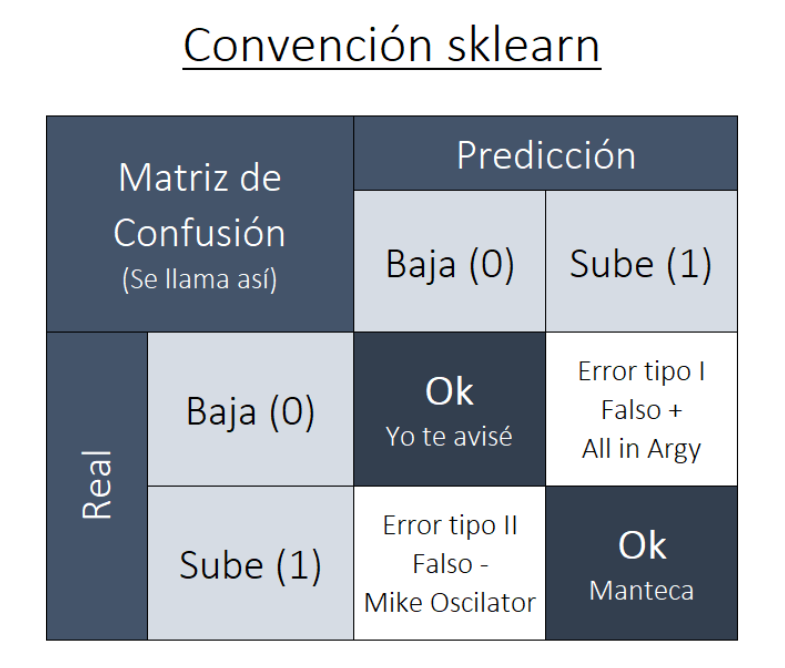

### Matriz de confusión "a mano"

In [ ]:
resultados = list(zip(y_test, y_pred))

manteca = 0
mike = 0
yoteavise = 0
allin = 0

for real, prediccion in resultados:

    if (real==0) & (prediccion==0):
        # Verdaderos negativos
        yoteavise += 1
    if (real==0) & (prediccion==1):
        # Falsos positivos
        allin += 1
    if (real==1) & (prediccion==0):
        # Falsos negativos
        mike +=1
    if (real==1) & (prediccion==1):
        # Verdaderos positivos
        manteca +=1


print(f"yoteavise: {yoteavise}, allin: {allin}, mike: {mike}, manteca: {manteca}")

yoteavise: 217, allin: 92, mike: 88, manteca: 466


In [ ]:
# Veo los valores normalizados (en % sobre el total)

res = np.array([yoteavise, allin, mike, manteca])
print(
    f"yoteavise: {res[0]/res.sum():.0%}, "
    f"allin: {res[1]/res.sum():.0%}, "
    f"mike: {res[2]/res.sum():.0%}, "
    f"manteca: {res[3]/res.sum():.0%}"
)

yoteavise: 25%, allin: 11%, mike: 10%, manteca: 54%


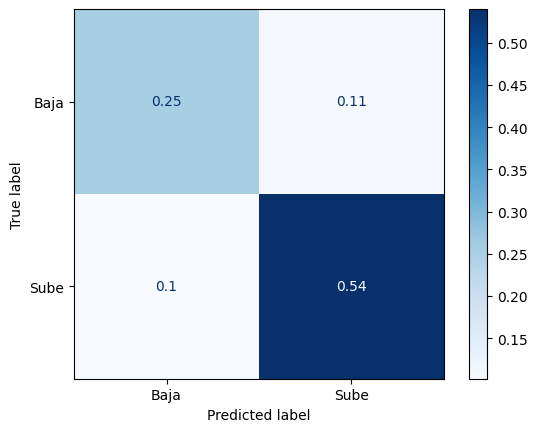

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test,
                                             normalize='all', # all, pred, true, None (segun si quiero que normalice por matriz, filas/cols o ninguno)
                                             display_labels=['Baja','Sube'],
                                             cmap='Blues')


m = disp.confusion_matrix

In [ ]:
# Me queda en "m" la matriz en un tensor o numpy array (matriz de 2x2)
m

array([[0.16106605, 0.198146  ],
       [0.02665122, 0.61413673]])

## Normalizado de matriz de confusión

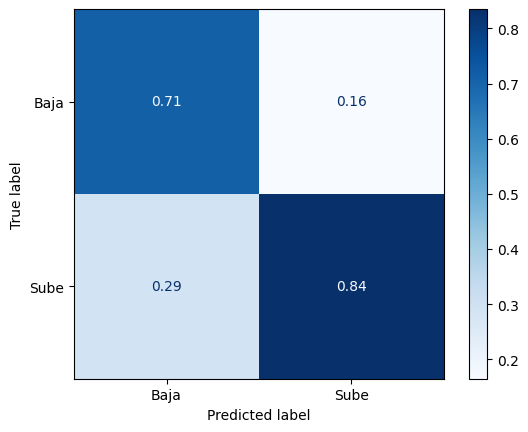

In [ ]:
# Sin normalizar
disp = ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test,
                                             normalize="pred", # all, pred, true, None (segun si quiero que normalice por matriz, filas/cols o ninguno)
                                             display_labels=['Baja','Sube'], cmap='Blues')

In [ ]:
# Matriz de confusion sin usar visualizadores

from sklearn.metrics import confusion_matrix

m = np.array(confusion_matrix(y_test, y_pred, normalize='all')).round(2)

matriz = {'manteca':m[1][1], 'mike oscilator':m[1][0],'all in':m[0][1], 'yo te avise':m[0][0]}

resumen = {'aciertos' : f"{matriz['manteca']+matriz['yo te avise']:.1%}",
           'sesgo +': f"{matriz['manteca']+matriz['all in']:.1%}"}

print('Arboles de decisión: \n',m,'\nPorcentajes:\n',matriz,'\n',resumen)

Arboles de decisión: 
 [[0.25 0.11]
 [0.1  0.54]] 
Porcentajes:
 {'manteca': np.float64(0.54), 'mike oscilator': np.float64(0.1), 'all in': np.float64(0.11), 'yo te avise': np.float64(0.25)} 
 {'aciertos': '79.0%', 'sesgo +': '65.0%'}


### Ojo con la definición de tuplas

Si definimos una tupla como x=(1), me va a asignar el entero 1 a la variable "x"

Si quisiera que me asigne la tupla con el valor 1 como único valor debo poner x=(1,)

In [ ]:
a = 5
b = (5)
c = (5,)

In [ ]:
type(a), type(b), type(c)

(int, int, tuple)

In [ ]:
# Si quisiera pasar un parametro que sea una tupla de una única lista?
([1,2,3,4],)

([1, 2, 3, 4],)

## Vemos predicción de algún valor

In [ ]:
# Los predictores
X

Price       RSI_50 sma_volatilidad ema_volatilidad SPY_Corr cruce_30_100  \
Ticker                                                                     
Date                                                                       
2001-10-05  0.3407          0.3558          0.3288   0.4239      -0.3351   
2001-10-08  0.3379          0.3536          0.3209   0.4242      -0.3436   
2001-10-09  0.3405          0.3532          0.3167   0.4169      -0.3510   
2001-10-10  0.3556          0.3664          0.3397   0.4838      -0.3605   
2001-10-11  0.3758          0.3849          0.3710   0.5059      -0.3673   
...            ...             ...             ...      ...          ...   
2024-08-07  0.5122          0.2601          0.2311   0.4209      -0.0387   
2024-08-08  0.5585          0.2967          0.2988   0.5394      -0.0390   
2024-08-09  0.5733          0.2982          0.2959   0.5313      -0.0388   
2024-08-12  0.5733          0.2876          0.2889   0.5316      -0.0374   
2024-08-13  0.5751          0.2861          0.2818   0.5187      -0.0325   

Price      cruce_50_200 cruce_70_300  
Ticker                                
Date                                  
2001-10-05      -0.3715      -0.3030  
2001-10-08      -0.3785      -0.3110  
2001-10-09      -0.3847      -0.3195  
2001-10-10      -0.3902      -0.3278  
2001-10-11      -0.3946      -0.3355  
...                 ...          ...  
2024-08-07       0.3022       0.5287  
2024-08-08       0.2972       0.5254  
2024-08-09       0.2922       0.5219  
2024-08-12       0.2850       0.5186  
2024-08-13       0.2789       0.5157  

[5752 rows x 7 columns]

In [ ]:
# Los predictores completos (sin el dropna que me borraba los ultimos que no tienen FW)
X_full = data_full.iloc[:,-8:-1]
X_full

Price         RSI_50 sma_volatilidad ema_volatilidad  SPY_Corr cruce_30_100  \
Ticker                                                                        
Date                                                                          
2000-07-25       NaN             NaN             NaN       NaN          NaN   
2000-07-26       NaN             NaN             NaN       NaN          NaN   
2000-07-27       NaN             NaN        0.000000       NaN          NaN   
2000-07-28  0.000000             NaN        0.026404       NaN          NaN   
2000-07-31  0.718388             NaN        0.069713       NaN          NaN   
...              ...             ...             ...       ...          ...   
2025-05-27  0.518685        0.306541        0.216484  0.683489     0.005548   
2025-05-28  0.513229        0.306178        0.212053  0.690805     0.005374   
2025-05-29  0.496478        0.302722        0.214396  0.680873     0.006387   
2025-05-30  0.495660        0.298225        0.209106  0.681597     0.007296   
2025-06-02  0.486052        0.298287        0.206450  0.682987     0.006780   

Price      cruce_50_200 cruce_70_300  
Ticker                                
Date                                  
2000-07-25          NaN          NaN  
2000-07-26          NaN          NaN  
2000-07-27          NaN          NaN  
2000-07-28          NaN          NaN  
2000-07-31          NaN          NaN  
...                 ...          ...  
2025-05-27     0.061427     0.259561  
2025-05-28     0.059517     0.256627  
2025-05-29     0.058372     0.253126  
2025-05-30     0.056150     0.249487  
2025-06-02     0.054070     0.245182  

[6251 rows x 7 columns]

In [ ]:
datosHoy = X_full.iloc[-1]
datosHoy

Price            Ticker
RSI_50                     0.486052
sma_volatilidad            0.298287
ema_volatilidad            0.206450
SPY_Corr                   0.682987
cruce_30_100               0.006780
cruce_50_200               0.054070
cruce_70_300               0.245182
Name: 2025-06-02 00:00:00, dtype: float64

In [ ]:
datosHoy.values

array([0.48605166, 0.29828739, 0.20645009, 0.68298735, 0.00677977,
       0.05407028, 0.24518231])

In [ ]:
modelo.predict((datosHoy,))

array([1])

In [ ]:
modelo.predict_proba((datosHoy,))

array([[0.01515152, 0.98484848]])

In [ ]:
ultimos = X_full[-5:]
prediccion_ultimos = modelo.predict(ultimos)
print('\nPrediccion Ultimos 5 valores actuales\n',prediccion_ultimos)


Prediccion Ultimos 5 valores actuales
 [1 1 1 1 1]


In [ ]:
ultimos = X_full[-5:]
prediccion_ultimos = modelo.predict_proba(ultimos)
print('\nPrediccion Ultimos 5 valores actuales\n',prediccion_ultimos)


Prediccion Ultimos 5 valores actuales
 [[0.01515152 0.98484848]
 [0.01515152 0.98484848]
 [0.01515152 0.98484848]
 [0.01515152 0.98484848]
 [0.01515152 0.98484848]]


<Axes: xlabel='Date'>

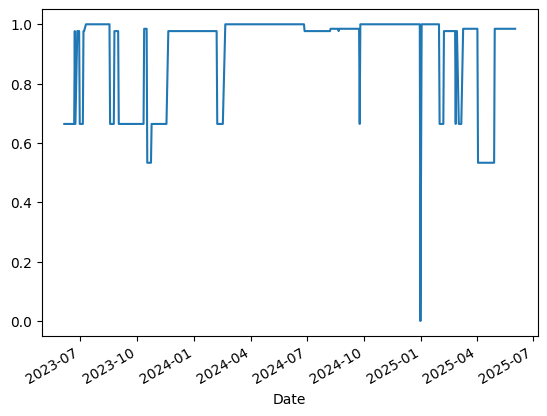

In [ ]:
pd.Series([x[1] for x in modelo.predict_proba(X_full.dropna())], index=X_full.dropna().index).iloc[-500:].plot()

<Axes: title={'center': 'Predicción de probabilidad de suba FW   //   Arbol de Decisión'}, xlabel='Date'>

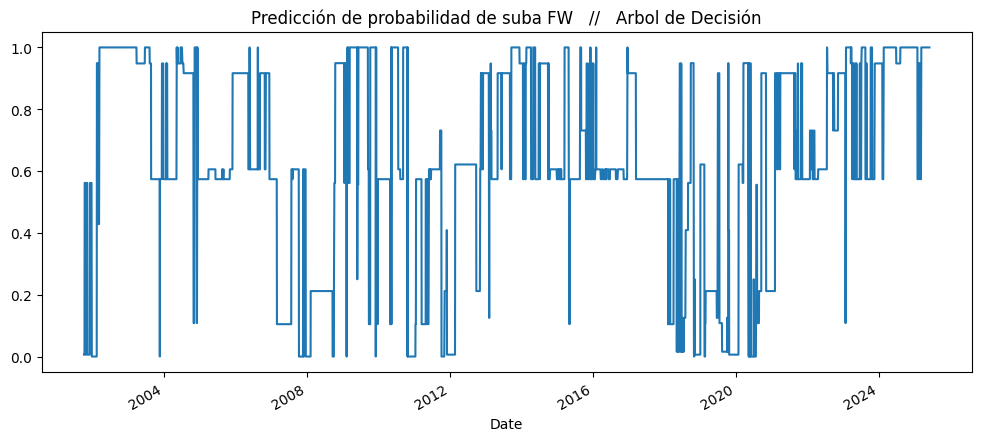

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

t = 'Predicción de probabilidad de suba FW   //   Arbol de Decisión'
pd.Series([x[1] for x in modelo.predict_proba(X_full.dropna())], index=X_full.dropna().index).plot(figsize=(12,5), title=t)

## Graficamos el modelo

In [ ]:
!pip install pydotplus

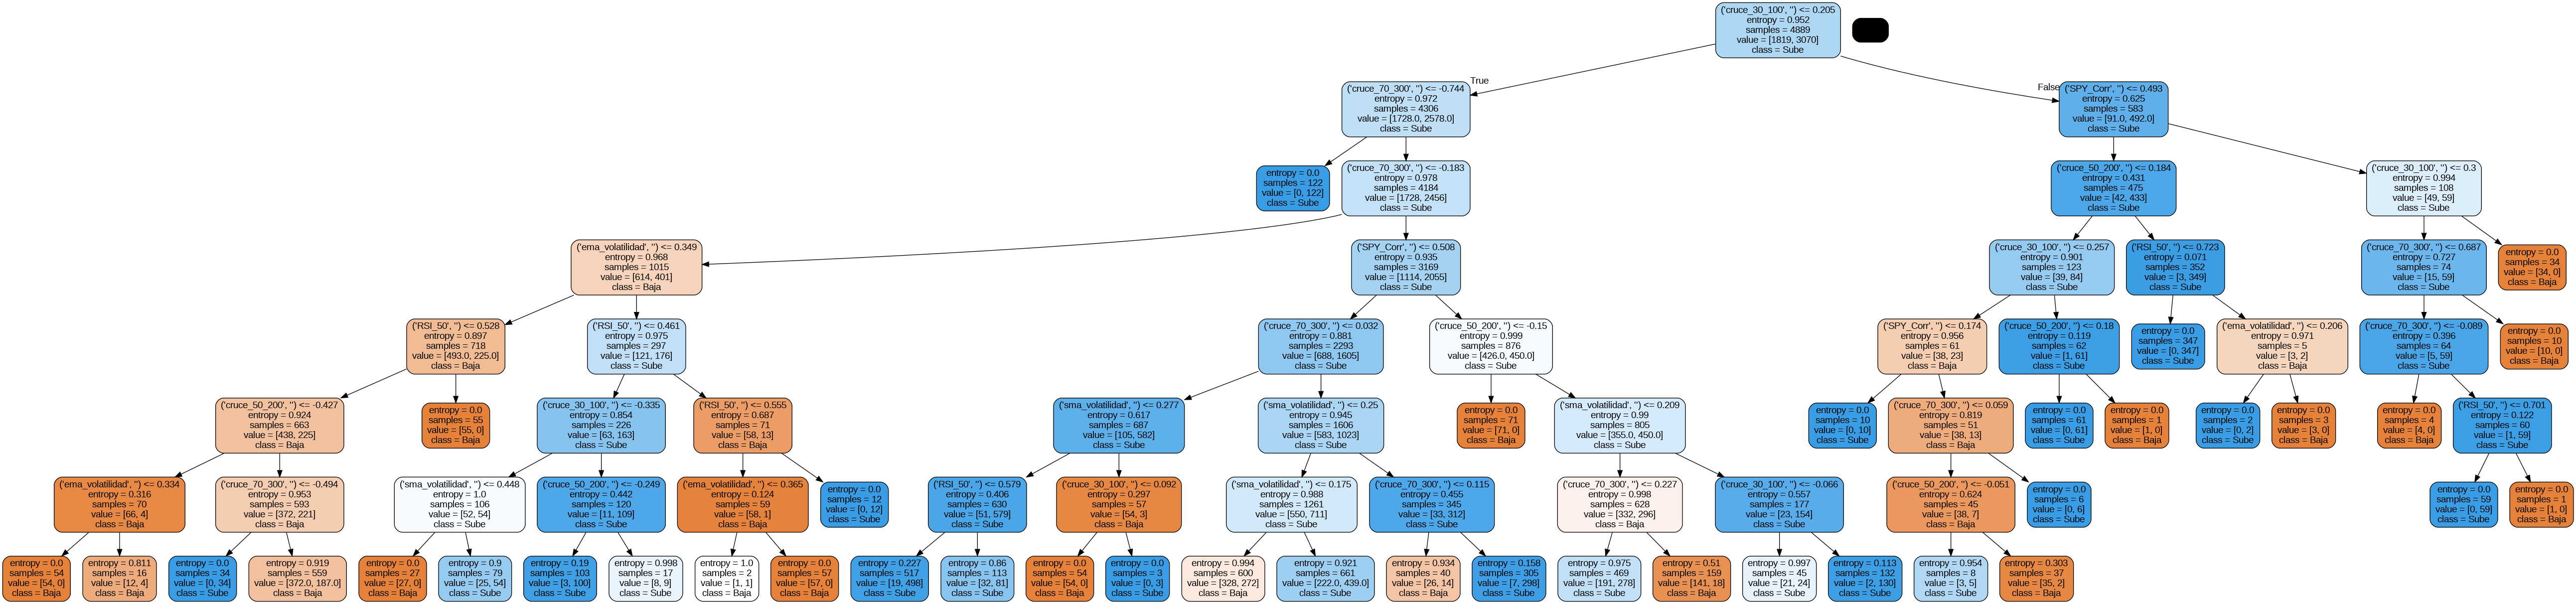

In [ ]:
# pip install pydotplus

from IPython.display import Image
from sklearn import tree
import pydotplus

# Esto si lo usan en local con anaconda
#import os
#os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

targets = ['Baja','Sube']

dot_data = tree.export_graphviz(
    modelo,
    out_file=None,
    feature_names=[str(c) for c in X.columns],
    class_names=targets,
    rounded=True,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)

# Lo mismo esto si lo usan en local y quieren guardar la imagen
# guardo la imagen en disco
# graph.write_png("imagenes/gashe2.png")

# imprimo en pantalla
Image(graph.create_png())

In [ ]:
# Si quieren la data para parsear del arbol:
dot_data[:500]

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="(\'cruce_30_100\', \'\') <= 0.205\\nentropy = 0.952\\nsamples = 4889\\nvalue = [1818.0, 3071.0]\\nclass = Sube", fillcolor="#aed7f4"] ;\n1 [label="(\'cruce_70_300\', \'\') <= -0.744\\nentropy = 0.972\\nsamples = 4312\\nvalue = [1729, 2583]\\nclass = Sube", fillcolor="#bedff6"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 134\\'

## Overfiteamos

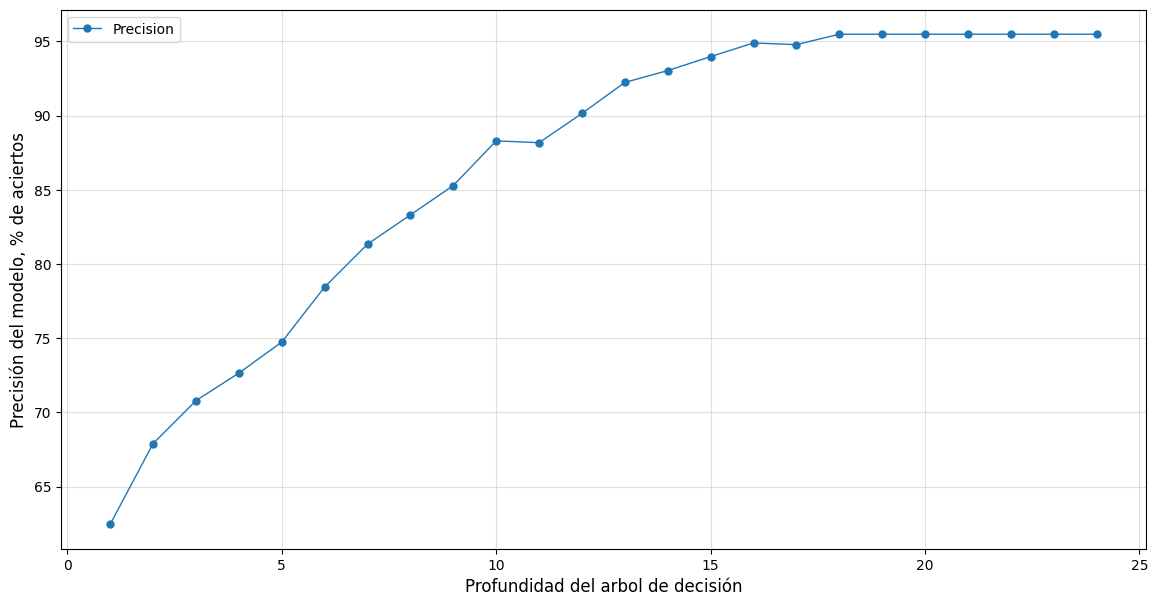

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
aciertos = []
for i in range(1,25):
    # Vamos a instanciar un modelo para cada profundidad hassta 25 niveles
    modelo = DecisionTreeClassifier(criterion = 'entropy', max_depth=i, random_state=0) #Definimos modelo
    modelo.fit(X_train, y_train) # Entrenamos
    y_pred = modelo.predict(X_test) # Corremos las predicciones
    m = np.array(confusion_matrix(y_test, y_pred)) # medimos que tan bien nos fue con OOS
    mp = (m/m.sum().sum() *100).round(2)
    aciertos.append( round(mp[0][0]+mp[1][1],2) )

aciertosTot = pd.DataFrame(aciertos, index=list(range(1,25)))
ax.plot(aciertosTot, markersize=5, marker='o', label='Precision', lw=1)
ax.grid(alpha=0.4)
ax.legend()
ax.set_ylabel('Precisión del modelo, % de aciertos', fontsize=12)
ax.set_xlabel('Profundidad del arbol de decisión', fontsize=12)
plt.show()

# Hay una profundidad razonable en un arbol de decision?

No, obvio que depende de los datos, del poder predictivo de los mismos, del nivel que querramos lograr de predictibilidad etc etc, pero podemos estimar una cantidad de niveles para obtener clusteres de decision de no menos de 30 datos (o un minimo a considerar segun las circunstancias), con esto no nos aseguramos nada, pero al menos ponemos una barrera al overfitting burdo

$$ \large 30 \cdot 2^{levels} \leq  |\text{X_train}| $$

Esto vale solo si cada nodo del arbol partiera en 2 la muestra de su nodo, cosa que no es cierta pero es solo un modelo naive para hacer la estimacion

In [ ]:
# podemos buscar para que nivel tenemos al menos 30 datos
30 * 2**7 <= len(X_train)

True

In [ ]:
30 * 2**8 <= len(X_train)

False

In [ ]:
for i in range(1,10):
    print(i, 30 * 2**i <= len(X_train))

1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 False
9 False


In [ ]:
import math

# me da que tiene que ser menos que 6,69 para tener un minimo de 30 datos por bloque
math.log(len(X_train)/30, 2)

7.3481379742102115

# Repaso en limpio

In [ ]:
import yfinance as yf, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

smas = ((30, 100), (50, 200), (70, 300))
ventana = 200

TICKER = "GGAL"
data = yf.download(TICKER, start='2000-01-01', auto_adjust=True, progress=False)
spy = yf.download('SPY', start='2000-01-01', auto_adjust=True, progress=False)

dif = data['Close'].diff()
RSI_CONS = 50
win = pd.DataFrame(np.where(dif > 0, dif, 0))
loss = pd.DataFrame(np.where(dif < 0, abs(dif), 0))
ema_win = win.ewm(alpha=1/RSI_CONS).mean()
ema_loss = loss.ewm(alpha=1/RSI_CONS).mean()
rs = ema_win / ema_loss
rsi = 100 - (100 / (1 + rs))
rsi.index = data.index

data['pctChange'] = data['Close'].pct_change()
data['fw'] = data['Close'].shift(-ventana)/data['Close']-1
data[f'RSI_{RSI_CONS}'] = rsi/100
data['sma_volatilidad'] = data['pctChange'].rolling(50).std() * 50**0.5
data['ema_volatilidad'] = data['pctChange'].ewm(span=40).std() * 40**0.5
data['SPY_Corr'] = data.Close.pct_change()[TICKER].rolling(40).corr(spy.Close.pct_change())
c1 = f'cruce_{smas[0][0]}_{smas[0][1]}'
c2 = f'cruce_{smas[1][0]}_{smas[1][1]}'
c3 = f'cruce_{smas[2][0]}_{smas[2][1]}'
data[c1] = data['Close'].rolling(smas[0][0]).mean()/data['Close'].rolling(smas[0][1]).mean()-1
data[c2] = data['Close'].rolling(smas[1][0]).mean()/data['Close'].rolling(smas[1][1]).mean()-1
data[c3] = data['Close'].rolling(smas[2][0]).mean()/data['Close'].rolling(smas[2][1]).mean()-1

data['target'] = 0
data.loc[data.fw >= 0 , 'target'] = 1

data_full = data.copy() # Esto nos va a servir despues cuando necesitemos los de hoy (sin etiquetas aun)
data = data.round(4).dropna()

y = list(data['target'])
X = data.iloc[:,-8:-1]


# En funcion de como hagan el split tienen o no el Data Leak que hablamos en clase
# Obviamente con Data Leak dan numeros hermosos pero es una trampa
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=55)
X_train, X_test = X.iloc[:4200], X.iloc[4500:]
y_train, y_test = y[:4200], y[4500:]


modelo = DecisionTreeClassifier(criterion = 'gini', max_depth=4, random_state=0)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

m = np.array(confusion_matrix(y_test, y_pred, normalize='all')).round(2)

ultimos = data_full.iloc[-5:,-8:-1]
prediccion_ultimos = modelo.predict_proba(ultimos)

print('Matriz de Confusion:\n', m)
print(f'\nAciertos % {m[0][0] + m[1][1]:.2%}')
print(f'Errores % {m[0][1] + m[1][0]:.2%}')
print('\nPrediccion Ultimos 5:\n', prediccion_ultimos)

Matriz de Confusion:
 [[0.01 0.27]
 [0.09 0.62]]

Aciertos % 63.00%
Errores % 36.00%

Prediccion Ultimos 5:
 [[0.30377358 0.69622642]
 [0.30377358 0.69622642]
 [0.30377358 0.69622642]
 [0.30377358 0.69622642]
 [0.30377358 0.69622642]]


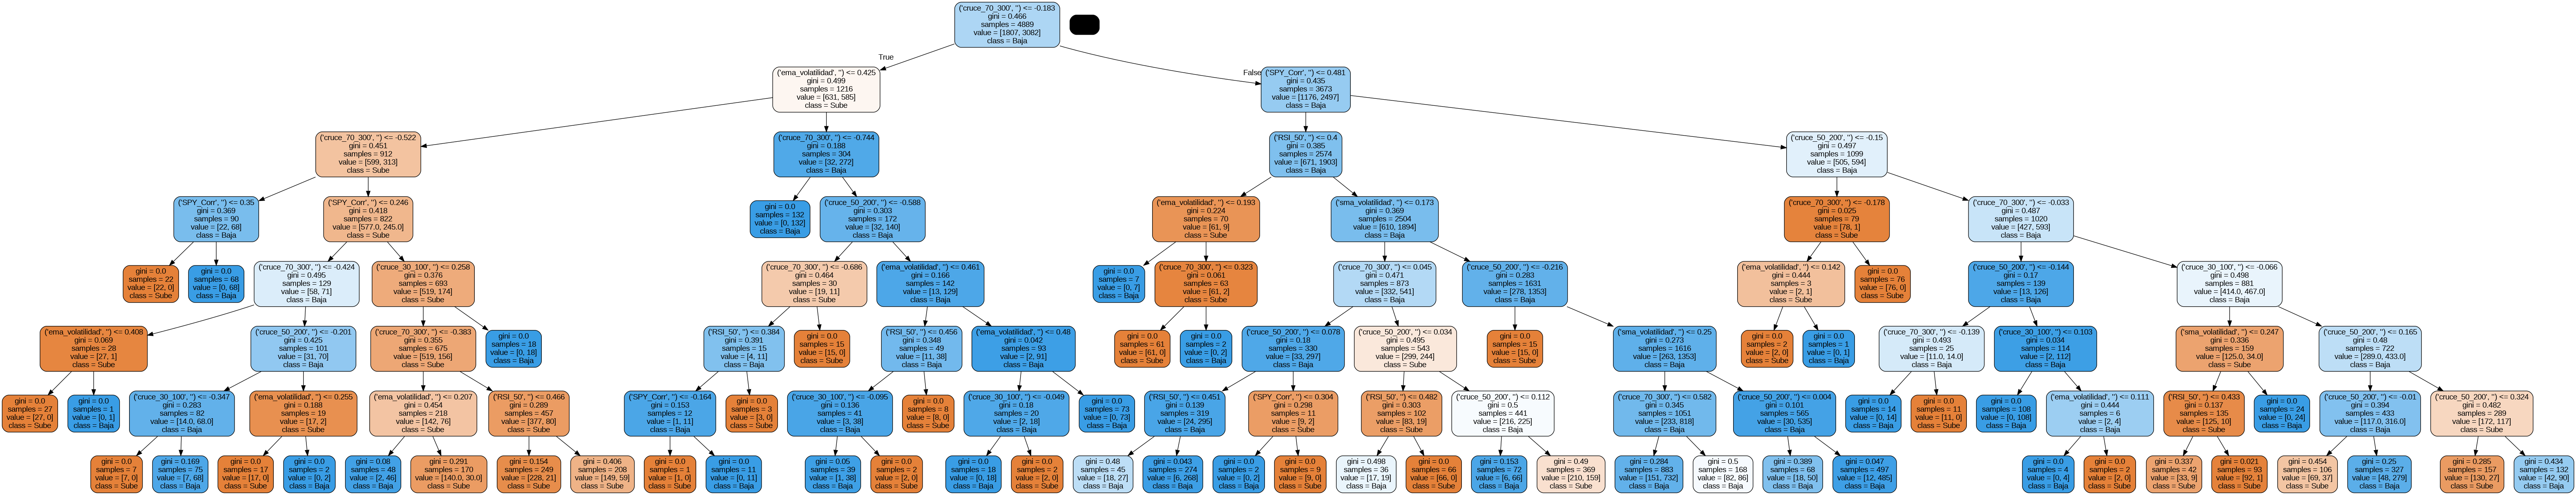

In [ ]:
# Agreguen esta linea para ejecutar local con anaconda
# os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

targets = ['Sube','Baja']

dot_data = tree.export_graphviz(
    modelo,
    out_file=None,
    feature_names=[str(c) for c in X.columns],
    class_names=targets,
    rounded=True,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)

# imprimo en pantalla
Image(graph.create_png())

# Plus: Persistencia de modelos y Os/Us

# Se acuerdan de la serializacion?

In [ ]:
import pickle

with open('modelo_arboles.dat' , 'wb') as file:
    pickle.dump(modelo, file)

# Reiniciamos kernel y probamos modelo pre-fiteado

In [ ]:
import pickle
with open('modelo_arboles.dat' , 'rb') as file:
    m_loaded = pickle.load(file)

In [ ]:
m_loaded

DecisionTreeClassifier(max_depth=7, random_state=0)

In [ ]:
import yfinance as yf, numpy as np, pandas as pd

smas = ((30, 100), (50, 200), (70, 300))
ventana = 200

TICKER = "GGAL"
data = yf.download(TICKER, start='2000-01-01', auto_adjust=True)
spy = yf.download('SPY', start='2000-01-01', auto_adjust=True)

dif = data['Close'].diff()
RSI_CONS = 50
win = pd.DataFrame(np.where(dif > 0, dif, 0))
loss = pd.DataFrame(np.where(dif < 0, abs(dif), 0))
ema_win = win.ewm(alpha=1/RSI_CONS).mean()
ema_loss = loss.ewm(alpha=1/RSI_CONS).mean()
rs = ema_win / ema_loss
rsi = 100 - (100 / (1 + rs))
rsi.index = data.index

data['pctChange'] = data['Close'].pct_change()
data['fw'] = data['Close'].shift(-ventana)/data['Close']-1
data[f'RSI_{RSI_CONS}'] = rsi/100
data['sma_volatilidad'] = data['pctChange'].rolling(50).std() * 50**0.5
data['ema_volatilidad'] = data['pctChange'].ewm(span=40).std() * 40**0.5
data['SPY_Corr'] = data.Close.pct_change()[TICKER].rolling(40).corr(spy.Close.pct_change())
c1 = f'cruce_{smas[0][0]}_{smas[0][1]}'
c2 = f'cruce_{smas[1][0]}_{smas[1][1]}'
c3 = f'cruce_{smas[2][0]}_{smas[2][1]}'
data[c1] = data['Close'].rolling(smas[0][0]).mean()/data['Close'].rolling(smas[0][1]).mean()-1
data[c2] = data['Close'].rolling(smas[1][0]).mean()/data['Close'].rolling(smas[1][1]).mean()-1
data[c3] = data['Close'].rolling(smas[2][0]).mean()/data['Close'].rolling(smas[2][1]).mean()-1

ultimos = data.iloc[-5:,-7:]
prediccion_ultimos = m_loaded.predict_proba(ultimos)
prediccion_ultimos

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


array([[0.15030675, 0.84969325],
       [0.15030675, 0.84969325],
       [0.15030675, 0.84969325],
       [0.15030675, 0.84969325],
       [0.15030675, 0.84969325]])

# OverSampling y UnderSampling

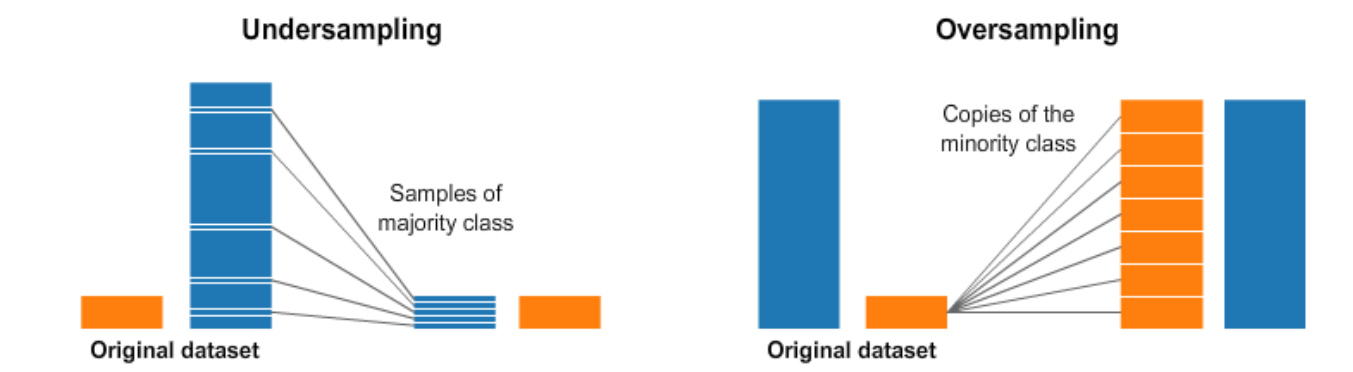

In [ ]:
# quiero predecir la probabilidad de que GGAL se vuele mas del 20% el proximo mes..

## Over Sampling:

Simplemente repitiendo al azar

* <b>RandomOverSampler</b>

Sintéticos

    * SMOTE
    * BorderlineSMOTE (Líneas de separación jerarárquicas)
    * KMeansSMOTE (c/modelo de agrupamiento KMeans)
    * SVMSMOTE (c/modelo de agrupamiento SVM)
    * SMOTEN (para predictores discretos)
    * SMOTENC (mezcla de predictores continuos y discretos)
    * ADASYN (sinteticos adaptativos)

Paper original <b>SMOTE</b>, DOI: 10.1613/jair.301
<br>https://www.jair.org/index.php/jair/article/view/10302/24590

<b>BorderLine</b> DOI DOI:10.1007/11538059_91
<br>https://sci2s.ugr.es/keel/keel-dataset/pdfs/2005-Han-LNCS.pdf

<b>ADASYN</b> DOI:10.1109/IJCNN.2008.4633969
<br>https://sci2s.ugr.es/keel/pdf/algorithm/congreso/2008-He-ieee.pdf

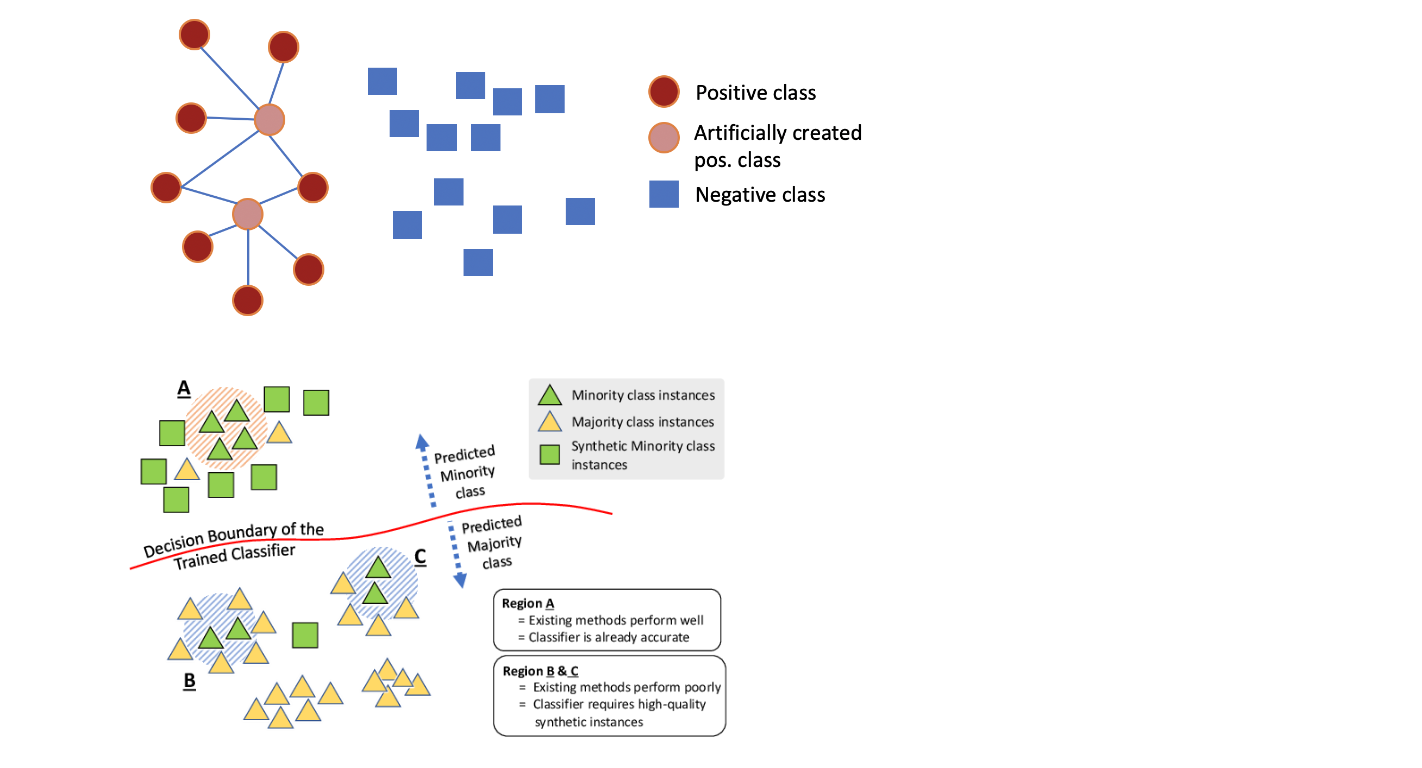

## Under Sampling

* <b>RandomUnderSampler</b>

* <b>NearMiss</b> (usa KNN, busca mas separacion de grupos)
* <b>ClusterCentroids</b> (Usa KMeans, remueve primero los mas parecidos, busca mas variabilidad, me gusta mas en la bolsa)
* CondensedNearestNeighbour (Busca la zona mas densa posible)
* EditedNearestNeighbours ENN (remueve primeros los korea del centro)
* RepeatedEditedNearestNeighbours (ENN recursivo)
* AllKNN (ENN adaptativo)
* InstanceHardnessThreshold (Usa cortes de clustering jerárquico y dendrogramas)
* NeighbourhoodCleaningRule (remueve primero los mas discordantes, saca ruido)
* OneSidedSelection
* TomekLinks

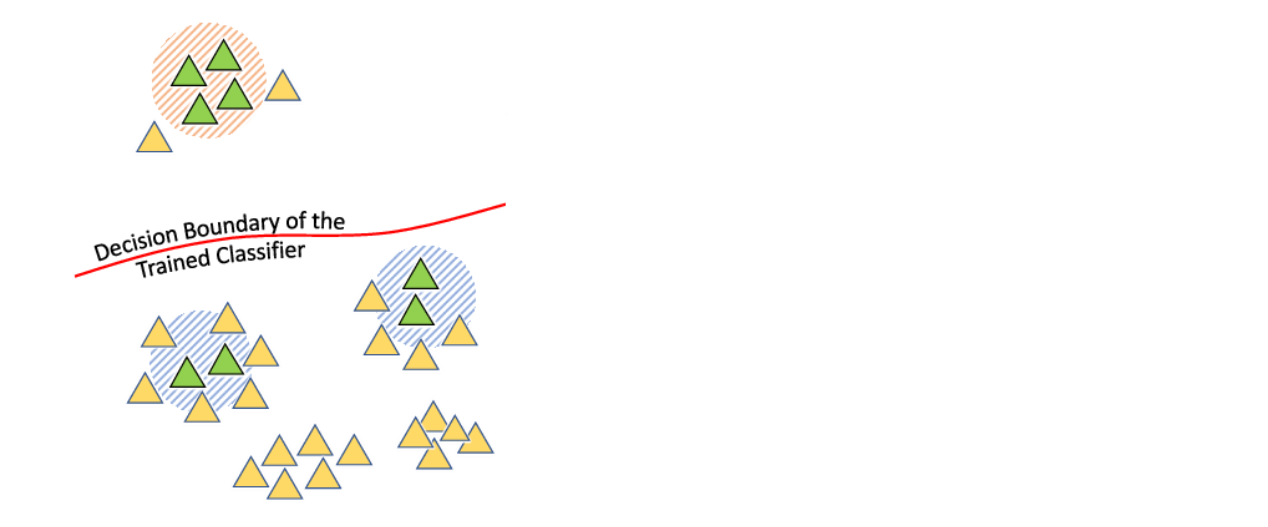

<b>NearMiss</b>
<br>https://www.site.uottawa.ca/~nat/Workshop2003/jzhang.pdf

<b>CondensedNearestNeighbour</b> DOI 10.1109/TIT.1968.1054155
<br>https://sci2s.ugr.es/keel/pdf/algorithm/articulo/1979-IEEE_TIT-Chidananda-IS-MNV.pdf

OneSideSelect
<br>https://sci2s.ugr.es/keel/pdf/algorithm/congreso/kubat97addressing.pdf

Neighboorhood Cleaning Rule
<br>https://www.scirp.org/pdf/JBiSE20101000009_16323745.pdf

InstanceHardnessThreshold
<br>https://link.springer.com/content/pdf/10.1007/s10994-013-5422-z.pdf

<b>Tomek</b> DOI 10.4236/jilsa.2015.74010
<br>https://www.scirp.org/(S(i43dyn45teexjx455qlt3d2q))/journal/paperinformation.aspx?paperid=60996

## Instalación e importación

In [ ]:
# conda install -c conda-forge imbalanced-learn

In [ ]:
from imblearn import over_sampling as os
from imblearn import under_sampling as us

## Ejemplos

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

smas = ((30, 100), (50, 200), (70, 300))
ventana = 200

TICKER = "GGAL"
data = yf.download(TICKER, start='2000-01-01', auto_adjust=True)
spy = yf.download('SPY', start='2000-01-01', auto_adjust=True)

dif = data['Close'].diff()
RSI_CONS = 50
win = pd.DataFrame(np.where(dif > 0, dif, 0))
loss = pd.DataFrame(np.where(dif < 0, abs(dif), 0))
ema_win = win.ewm(alpha=1/RSI_CONS).mean()
ema_loss = loss.ewm(alpha=1/RSI_CONS).mean()
rs = ema_win / ema_loss
rsi = 100 - (100 / (1 + rs))
rsi.index = data.index

data['pctChange'] = data['Close'].pct_change()
data['fw'] = data['Close'].shift(-ventana)/data['Close']-1
data[f'RSI_{RSI_CONS}'] = rsi/100
data['sma_volatilidad'] = data['pctChange'].rolling(50).std() * 50**0.5
data['ema_volatilidad'] = data['pctChange'].ewm(span=40).std() * 40**0.5
data['SPY_Corr'] = data.Close.pct_change()[TICKER].rolling(40).corr(spy.Close.pct_change())
c1 = f'cruce_{smas[0][0]}_{smas[0][1]}'
c2 = f'cruce_{smas[1][0]}_{smas[1][1]}'
c3 = f'cruce_{smas[2][0]}_{smas[2][1]}'
data[c1] = data['Close'].rolling(smas[0][0]).mean()/data['Close'].rolling(smas[0][1]).mean()-1
data[c2] = data['Close'].rolling(smas[1][0]).mean()/data['Close'].rolling(smas[1][1]).mean()-1
data[c3] = data['Close'].rolling(smas[2][0]).mean()/data['Close'].rolling(smas[2][1]).mean()-1

data.dropna(inplace=True)

data['se_vuela'] = np.where(data.fw > 0.9, 1, 0)

df = data.iloc[:, 8:]
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price      sma_volatilidad ema_volatilidad  SPY_Corr cruce_30_100  \
Ticker                                                              
Date                                                                
2001-10-05        0.355784        0.328763  0.423880    -0.335082   
2001-10-08        0.353551        0.320923  0.424217    -0.343647   
2001-10-09        0.353181        0.316747  0.416913    -0.351005   
2001-10-10        0.366384        0.339699  0.483818    -0.360456   
2001-10-11        0.384895        0.371004  0.505914    -0.367349   
...                    ...             ...       ...          ...   
2024-08-06        0.263637        0.234789  0.438199    -0.032807   
2024-08-07        0.260097        0.231063  0.420851    -0.038653   
2024-08-08        0.296719        0.298785  0.539418    -0.039020   
2024-08-09        0.298199        0.295869  0.531330    -0.038760   
2024-08-12        0.287570        0.288864  0.531576    -0.037435   

Price      cruce_50_200 cruce_70_300 se_vuela  
Ticker                                         
Date                                           
2001-10-05    -0.371485    -0.302954        0  
2001-10-08    -0.378498    -0.310955        0  
2001-10-09    -0.384733    -0.319523        0  
2001-10-10    -0.390179    -0.327763        0  
2001-10-11    -0.394555    -0.335485        0  
...                 ...          ...      ...  
2024-08-06     0.309076     0.533732        1  
2024-08-07     0.302181     0.528729        1  
2024-08-08     0.297173     0.525357        0  
2024-08-09     0.292212     0.521945        0  
2024-08-12     0.284973     0.518649        0  

[5751 rows x 7 columns]

In [ ]:
df.groupby('se_vuela').size()

se_vuela
0    4683
1    1068
dtype: int64

In [ ]:
X, Y = df.iloc[:,:-1], df.iloc[:,-1]

### OS, Random, SMOTE

In [ ]:
# Uso oversampling al azar
# Repite muestras del df original aleatoriamente

X_os, Y_os = os.RandomOverSampler().fit_resample(X,Y)

In [ ]:
df_os = pd.concat([X_os,Y_os], axis=1)
df_os

sma_volatilidad ema_volatilidad  SPY_Corr cruce_30_100 cruce_50_200  \
                                                                           
0           0.355784        0.328763  0.423880    -0.335082    -0.371485   
1           0.353551        0.320923  0.424217    -0.343647    -0.378498   
2           0.353181        0.316747  0.416913    -0.351005    -0.384733   
3           0.366384        0.339699  0.483818    -0.360456    -0.390179   
4           0.384895        0.371004  0.505914    -0.367349    -0.394555   
...              ...             ...       ...          ...          ...   
9361        0.227532        0.191406  0.434805     0.240192     0.337032   
9362        0.247547        0.229700  0.404007     0.145904     0.343586   
9363        0.141480        0.106144  0.484478    -0.026766    -0.020695   
9364        0.183392        0.159225  0.439803    -0.196391    -0.139393   
9365        0.132143        0.127748  0.412020    -0.033140    -0.045899   

     cruce_70_300 se_vuela  
                            
0       -0.302954        0  
1       -0.310955        0  
2       -0.319523        0  
3       -0.327763        0  
4       -0.335485        0  
...           ...      ...  
9361     0.398024        1  
9362     0.491894        1  
9363     0.031728        1  
9364    -0.092109        1  
9365     0.012342        1  

[9366 rows x 7 columns]

In [ ]:
df_os.groupby('se_vuela').size()

se_vuela
0    4683
1    4683
dtype: int64

In [ ]:
df.groupby('se_vuela').mean()

Price    sma_volatilidad ema_volatilidad  SPY_Corr cruce_30_100 cruce_50_200  \
Ticker                                                                         
se_vuela                                                                       
0               0.228796        0.204933  0.376772     0.010053     0.031036   
1               0.419748        0.374213  0.290303     0.026869     0.022419   

Price    cruce_70_300  
Ticker                 
se_vuela               
0            0.054088  
1           -0.002363

In [ ]:
# chequeamos como cambian los features luego del oversampling
# Fijense que la columna del 0 no cambia porque no la tocamos, pero la del 1 (se vuela) si que cambia levemente

X_os, Y_os = os.RandomOverSampler(random_state=0).fit_resample(X,Y)
df_os = pd.concat([X_os,Y_os], axis=1)
df_os.groupby('se_vuela').mean()

<ipython-input-78-9c32f62f23e4>:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_os.groupby('se_vuela').mean()


sma_volatilidad ema_volatilidad  SPY_Corr cruce_30_100 cruce_50_200  \
                                                                               
se_vuela                                                                       
0               0.228796        0.204933  0.376772     0.010053     0.031036   
1               0.426530        0.380132  0.287954     0.024744     0.016824   

         cruce_70_300  
                       
se_vuela               
0            0.054088  
1           -0.008433

In [ ]:
X_os, Y_os = os.SMOTE(random_state=0).fit_resample(X,Y)
df_os = pd.concat([X_os,Y_os], axis=1)
df_os.groupby('se_vuela').mean()

<ipython-input-79-a51a05f73da8>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_os.groupby('se_vuela').mean()


sma_volatilidad ema_volatilidad  SPY_Corr cruce_30_100 cruce_50_200  \
                                                                               
se_vuela                                                                       
0               0.228796        0.204933  0.376772     0.010053     0.031036   
1               0.417583        0.370227  0.291666     0.029498     0.022962   

         cruce_70_300  
                       
se_vuela               
0            0.054088  
1           -0.003088

### US, Random, NearMiss,

In [ ]:
df.groupby('se_vuela').size()

se_vuela
0    4683
1    1068
dtype: int64

In [ ]:
 df.groupby('se_vuela').mean()

Price    sma_volatilidad ema_volatilidad  SPY_Corr cruce_30_100 cruce_50_200  \
Ticker                                                                         
se_vuela                                                                       
0               0.228796        0.204933  0.376772     0.010053     0.031036   
1               0.419748        0.374213  0.290303     0.026869     0.022419   

Price    cruce_70_300  
Ticker                 
se_vuela               
0            0.054088  
1           -0.002363

In [ ]:
# chequeamos como cambian los features luego del undersampling
# Fijense que la columna del 0 ahora cambia porque ahora es la que achicamos, pero la del 1 (se vuela) ahora no la tocamos y queda igual

X_us, Y_us = us.RandomUnderSampler(random_state=0).fit_resample(X,Y)
df_us = pd.concat([X_us,Y_us], axis=1)
#df_us.groupby('se_vuela').size(),
df_us.groupby('se_vuela').mean()

<ipython-input-82-432a0a73b6d6>:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_us.groupby('se_vuela').mean()


sma_volatilidad ema_volatilidad  SPY_Corr cruce_30_100 cruce_50_200  \
                                                                               
se_vuela                                                                       
0               0.228125        0.205387  0.372260     0.016987     0.032007   
1               0.419748        0.374213  0.290303     0.026869     0.022419   

         cruce_70_300  
                       
se_vuela               
0            0.049861  
1           -0.002363

In [ ]:
X_us, Y_us = us.NearMiss().fit_resample(X,Y)
df_us = pd.concat([X_us,Y_us], axis=1)
#df_us.groupby('se_vuela').size(),
df_us.groupby('se_vuela').mean()

<ipython-input-83-6b6f9daca667>:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_us.groupby('se_vuela').mean()


sma_volatilidad ema_volatilidad  SPY_Corr cruce_30_100 cruce_50_200  \
                                                                               
se_vuela                                                                       
0               0.216261        0.190239  0.355614     0.030802     0.073603   
1               0.419748        0.374213  0.290303     0.026869     0.022419   

         cruce_70_300  
                       
se_vuela               
0            0.113666  
1           -0.002363

# Criterio de Entropía e impureza de gini

## Fórmulas

$$ {\text{Ganancia de información, Entropia}}(S)= \large - \sum _{i=1}^{n}p_{i}\log _{2}p_{i} $$

$$ {\text{Impureza de Gini} \hspace{0.5cm}  \large I_{G}(p)=\sum _{i=1}^{m}p_{i}(1-p_{i})=\sum _{i=1}^{m}(p_{i}-{p_{i}}^{2})=1-\sum _{i=1}^{m}{p_{i}}^{2}} $$

## Implementamos las funciones

In [ ]:
from math import log
import numpy as np
import pandas as pd

def gini(p):
    return 1 - (p**2 + (1-p)**2)

def entropy(p, base=2):
    try:
        var =  abs(p*log(p, base)+(1-p)*log(1-p, base))
        return var
    except (ValueError):
        return 0

In [ ]:
p_subas = np.linspace(0,1,100, endpoint=False)
data_gini = [gini(x) for x in p_subas]
data_entropy = [entropy(x) for x in p_subas]
df = pd.DataFrame(zip(p_subas, data_gini, data_entropy), columns=['P','Gini','Entropy']).set_index('P')
df

Gini   Entropy
P                     
0.00  0.0000  0.000000
0.01  0.0198  0.080793
0.02  0.0392  0.141441
0.03  0.0582  0.194392
0.04  0.0768  0.242292
...      ...       ...
0.95  0.0950  0.286397
0.96  0.0768  0.242292
0.97  0.0582  0.194392
0.98  0.0392  0.141441
0.99  0.0198  0.080793

[100 rows x 2 columns]

<Axes: xlabel='P'>

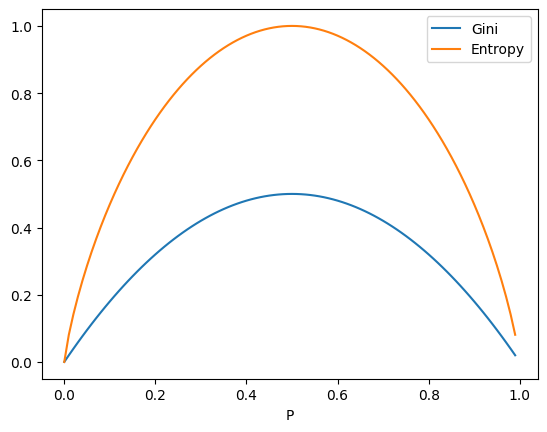

In [ ]:
df.plot()

<Axes: xlabel='P'>

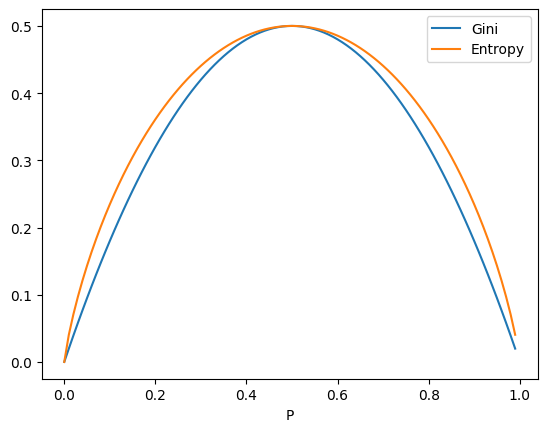

In [ ]:
df_escalada = df.copy()
df_escalada['Entropy'] /= 2
df_escalada.plot()

## Sensibilidad, Derivamos

Text(0.5, 1.0, 'Zona mas definida')

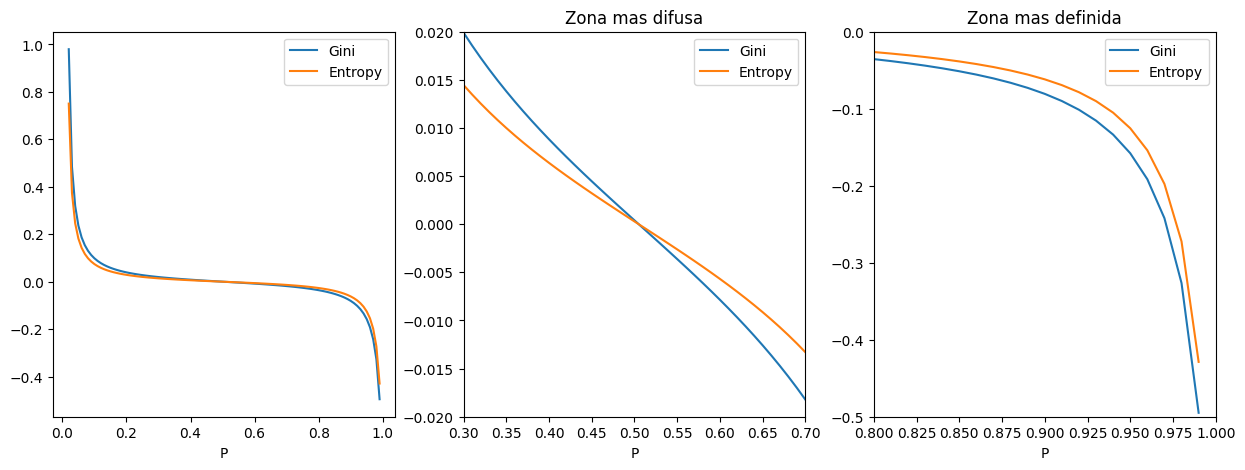

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5), ncols=3)

df.pct_change().plot(ax=ax[0])
df.pct_change().plot(xlim=(.3,.7), ylim=(-.02,.02), ax=ax[1])
df.pct_change().plot(xlim=(.8,1), ylim=(-.5,0), ax=ax[2])
ax[1].set_title('Zona mas difusa')
ax[2].set_title('Zona mas definida')

In [ ]:
tasas = df.pct_change().abs().iloc[2:]
tasas.mean()

Gini       0.067372
Entropy    0.052136
dtype: float64